# 데이터를 관리하는 다양한 방식

- 파이썬은 다양한 입출력 기능을 가지고 있다. 어떤 기능은 성능에, 다른 것은 유연성에 최적화 되어 있다.

- 그렇기에 대화형 작업이든 대규모 작업이든 모두 가리지 않고 쉽게 사용할 수 있다.

- 주식, 채권, 재무데이터 등등 금융데이터를 다루기 전에 다양한 데이터를 읽고 쓰고 저장하는 방법에 대해 학습합니다.




## 자료를 파일로 관리
## 일반 텍스트를 파일로 저장할 때는 파일 입출력을 이용

### open()/close()/write() method

- open() : 파일 내용을 읽거나 쓰기 위하여 여는 built-in function

- 변수명 = open(“파일 경로”, “파일 열기 모드”)  

<br><br><br>  
  
|파일열기모드|설명|
|------|------|
|r|읽기모드 - 파일을 읽기만 할 때 사용|
|w|쓰기모드 - 파일에 내용을 쓸 때 사용(항상 파일 내용을 초기화 시킨다.)|
|a|추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용|

<br><br><br>  

- close() : 작업이 끝난 파일 객체를 닫는 method

    - open() 할 경우 파일의 내용이 컴퓨터 메모리에 적재됨. 사용하지 않는 파일일 경우 닫아줘야 메모리 부족이나, 파일 충돌 등의 문제를 방지 할 수 있음

- write() : 파일에 내용을 기록하기 위해 사용하는 method

In [1]:
# 파일을 읽고 쓰고 저장할 경로를 지정한다

path = r'C:\Users\inventor\Desktop\FR study\FR-30th\Basic\data_structure\io_practice'
name = 'files'
folder = path + '/' + name + '/'

# working directory를 조회
print(os.getcwd())

# 여러 번 실행할 때, 동일한 폴더가 존재해서 생기는 오류 예외처리
try:
    # 폴더 생성
    os.mkdir(folder)

    # working directory를 변경
    os.chdir(folder)
except FileExistsError:
    print(f"기존에 {name}과 동일한 폴더의 이름이 존재합니다.")
    os.chdir(folder)

c:\Users\inventor\Desktop\FR study\FR-30th\Basic\data_structure\io_practice
기존에 files과 동일한 폴더의 이름이 존재합니다.


In [2]:
# 파일을 쓰기 모드로 연다.
f = open("new_file_1.txt", 'w')

# 파일 객체를 닫는다.
f.close()

# 파일을 쓰기 모드로 연다.
f = open("new_file_2.txt", 'w')

for i in range(1, 11):
    data = "%d line\n" % i
    f.write(data)

f.close()

# f.open(), f.close()를 매번 해줘야 하는 것은 귀찮다. 파이썬의 with 문은 이런 귀찮음을 해결해줌

with open("new_file_1.txt", "w") as f:
    data = "%d line\n" % i
    f.write(data)

# 위와 같이 with문을 사용하면 with 블록을 벗어나는 순간 열린 파일 객체 f가 자동으로 close되어 편리하다.

### readline(), readlines(), read() method

- readline() : 파일의 내용을 한 줄씩 반환한다.

- readlines() : 파일의 내용을 모두 읽고, 각 줄을 원소로 하는 list를
반환한다.

- read(size) : size(bytes) 만큼 파일의 내용을 읽고 그 내용을 반환함.
size를 전달 하지 않을 경우 파일 전체 내용을 반환

In [3]:
# readline으로 읽기
f= open("new_file_2.txt", 'r')
while True:
    line = f.readline()
    if not line: 
        print("파일의 끝입니다")
        break
    print(line)
f.close()

print('\n\n')
# readlines로 읽기
f = open("new_file_2.txt", 'r')
lines = f.readlines()
print(lines)
for line in lines:
    print(line)
f.close()

# read로 읽기
f = open("new_file_2.txt", 'r')
file_content = f.read()
print(file_content)
f.close()

1 line

2 line

3 line

4 line

5 line

6 line

7 line

8 line

9 line

10 line

파일의 끝입니다



['1 line\n', '2 line\n', '3 line\n', '4 line\n', '5 line\n', '6 line\n', '7 line\n', '8 line\n', '9 line\n', '10 line\n']
1 line

2 line

3 line

4 line

5 line

6 line

7 line

8 line

9 line

10 line

1 line
2 line
3 line
4 line
5 line
6 line
7 line
8 line
9 line
10 line



### 자료를 excel, csv로 관리

- 일반적으로 많이 사용하는 방법

- 위의 경우와 같이 open("data.csv", "w"), open("data.xlsx", "r") 와 같은 식으로 사용하면 된다.

- csv, excel 파일도 open으로 열고 readline, readlines 를 사용할 수 있다.

- dataframe_practice.ipynb 에서 다뤘던 시계열 예제를 그대로 사용하겠다. (설명은 모두 생략. dataframe_practice.ipynb 참고)

- 주로 pandas를 사용한 입출력 방식을 사용하겠다.

    - csv, sql, xls, xlsx, json, html, hdf 와 같은 여러 가지 자료 포맷으로 쓰거나 읽을 수 있다.

In [6]:
import pandas as pd
import numpy as np

np.random.seed(0)
a = np.random.standard_normal((9, 4))
a.round(6)

headers=['No1', 'No2', 'No3', 'No4']
dates = pd.date_range('2015-1-1', periods=9, freq='M')

df = pd.DataFrame(a, index=dates, columns=headers)

df

,No1,No2,No3,No4
2015-01-31,1.764052,0.400157,0.978738,2.240893
2015-02-28,1.867558,-0.977278,0.950088,-0.151357
2015-03-31,-0.103219,0.410599,0.144044,1.454274
2015-04-30,0.761038,0.121675,0.443863,0.333674
2015-05-31,1.494079,-0.205158,0.313068,-0.854096
2015-06-30,-2.552990,0.653619,0.864436,-0.742165
2015-07-31,2.269755,-1.454366,0.045759,-0.187184
2015-08-31,1.532779,1.469359,0.154947,0.378163
2015-09-30,-0.887786,-1.980796,-0.347912,0.156349


In [7]:
# open을 사용해서 직접 저장하고 읽어오는 건 궁금해지면 혼자 해보고 모르면 물어보기
# csv로 저장
df.to_csv('random_data.csv')

# csv 읽어오기 저번 내용 참고
df = pd.read_csv('random_data.csv',index_col=0, parse_dates=True)
df

,No1,No2,No3,No4
2015-01-31,1.764052,0.400157,0.978738,2.240893
2015-02-28,1.867558,-0.977278,0.950088,-0.151357
2015-03-31,-0.103219,0.410599,0.144044,1.454274
2015-04-30,0.761038,0.121675,0.443863,0.333674
2015-05-31,1.494079,-0.205158,0.313068,-0.854096
2015-06-30,-2.552990,0.653619,0.864436,-0.742165
2015-07-31,2.269755,-1.454366,0.045759,-0.187184
2015-08-31,1.532779,1.469359,0.154947,0.378163
2015-09-30,-0.887786,-1.980796,-0.347912,0.156349


### 자료를 db를 사용하여 관리

- 일반적인 db구축은 시간이 소모되고 db구축법을 공부해야하므로 파이썬 내장 db splite3 사용법만 학습한다

- sql 즉 쿼리문을 알면 데이터베이스에 자료를 CRUD (create, read, update, delete)를 자유롭게 할 수 있다.

- 여기서는 간단한 예 정도만 확인해본다.

In [30]:
# 파이썬에서 디폴트로 사용하는 데이터베이스 SQLite3
import sqlite3 as sq3
from sqlite3 import OperationalError
import datetime

# SQL 쿼리는 문자열 객체로 구성됨. 문법이나 자료형 등은 당연히 사용하는 데이터베이스에 따라 달라짐
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real, No3 real, No4 real)'

# 데이터베이스 연결을 시작한다. 여기에서는 하드디스크에 새 데이터베이스 파일을 생성한다.
try:
    con = sq3.connect('numbs.db')

    # execute 메서드로 테이블을 생성하는 쿼리문을 실행시킨다.
    con.execute(query)

    # 실제로 쿼리문이 실행되려면 commit 메서드를 호출해야한다.
    con.commit()

    # 데이터베이스에 한꺼번에 대량의 자료를 써보자.
    data = np.random.seed(0)
    data = np.random.standard_normal((1000, 4))
    data.round(6)

    for row in data:
        con.execute('INSERT INTO numbs VALUES(?, ?, ?, ?, ?)', (datetime.datetime.now(), row[0], row[1], row[2], row[3]))
    con.commit()

except OperationalError:

    print("기존에 동일한 데이터베이스가 존재합니다.")

finally:

    # 여러개를 쓰는 메서드로 executemany도 있지만 여기에서는 각각의 난수에 날짜-시간 정보를 조합하기 때문에 사용할 수 없음
    # 여러개의 자료를 한번에 가져오려면 fetchmany() 사용
    # 모든 데이터를 읽어오려면 fetchall() 사용

    n=10
    print(con.execute('SELECT * FROM numbs').fetchmany(n))
    print(f"{n}개의 데이터를 읽어왔습니다.")
    print('\n')

    # 한번에 하나의 자료만 읽어와보자
    pointer = con.execute('SELECT * FROM numbs')

    n=3
    for i in range(n):
        print(pointer.fetchone())

    print(f"데이터를 한개씩 총 {n}개 읽어왔습니다.")
    con.close()

# 기본적인 SQL문법은 사용하고자 하는 데이터베이스에 의해 결정되며, 나머지는 파이썬 스타일에 따른다.

기존에 동일한 데이터베이스가 존재합니다.
[('2020-09-03 16:39:18.840100', 1.764052345967664, 0.4001572083672233, 0.9787379841057392, 2.240893199201458), ('2020-09-03 16:39:18.842095', 1.8675579901499675, -0.977277879876411, 0.9500884175255894, -0.1513572082976979), ('2020-09-03 16:39:18.843092', -0.10321885179355784, 0.41059850193837233, 0.144043571160878, 1.454273506962975), ('2020-09-03 16:39:18.843092', 0.7610377251469934, 0.12167501649282841, 0.44386323274542566, 0.33367432737426683), ('2020-09-03 16:39:18.843092', 1.4940790731576061, -0.20515826376580087, 0.31306770165090136, -0.8540957393017248), ('2020-09-03 16:39:18.843092', -2.5529898158340787, 0.6536185954403606, 0.8644361988595057, -0.7421650204064419), ('2020-09-03 16:39:18.843092', 2.2697546239876076, -1.4543656745987648, 0.04575851730144607, -0.1871838500258336), ('2020-09-03 16:39:18.843092', 1.5327792143584575, 1.469358769900285, 0.1549474256969163, 0.37816251960217356), ('2020-09-03 16:39:18.843092', -0.8877857476301128, -1.9807964682239

In [34]:
# 일반적으로 가장 효율적인 방법은 전체 테이블이나 쿼리 결과를 pandas로 한번에 읽는 것이다.
# 전체 테이블을 메모리에 읽어들일 수 있다면 쿼리 작업은 디스크 기반의 SQL 작업보다 훨씬 빠르게 실행될 수 있다.
# 위에서 작성한 데이터베이스 파일 numbs.db를 pandas로 읽어와보자
con = sq3.connect("numbs.db")
%time data = pd.read_sql("SELECT * FROM numbs", con)

data.head(10)

# 이렇게 pandas를 이용해 자료를 메모리상에 올려놓고 SQL쿼리문을 이용해서 자료를 인덱싱하는 것보다, pandas 인덱싱을 하는 것이 훨씬 빠르다.


Wall time: 8.99 ms


,Date,No1,No2,No3,No4
0,2020-09-03 16:39:18.840100,1.764052,0.400157,0.978738,2.240893
1,2020-09-03 16:39:18.842095,1.867558,-0.977278,0.950088,-0.151357
2,2020-09-03 16:39:18.843092,-0.103219,0.410599,0.144044,1.454274
3,2020-09-03 16:39:18.843092,0.761038,0.121675,0.443863,0.333674
4,2020-09-03 16:39:18.843092,1.494079,-0.205158,0.313068,-0.854096
5,2020-09-03 16:39:18.843092,-2.552990,0.653619,0.864436,-0.742165
6,2020-09-03 16:39:18.843092,2.269755,-1.454366,0.045759,-0.187184
7,2020-09-03 16:39:18.843092,1.532779,1.469359,0.154947,0.378163
8,2020-09-03 16:39:18.843092,-0.887786,-1.980796,-0.347912,0.156349
9,2020-09-03 16:39:18.843092,1.230291,1.202380,-0.387327,-0.302303


# 자료를 pickle 모듈을 이용하여 관리

- 일반 텍스트를 파일로 저장할 때는 파일 입출력을 이용한다.

- 하지만 리스트나 클래스같은 텍스트가 아닌 자료형은 일반적인 파일 입출력 방법으로는 데이터를 저장하거나 불러올 수 없다.

- 파이썬에서는 이와 같은 텍스트 이외의 자료형을 파일로 저장하기 위하여 pickle이라는 모듈을 제공한다.

- 이 모듈은 대부분의 파이썬 객체를 직렬화할 수 있다. 직렬화(serialize)는 계층을 가진 객체를 바이트열로 변환하는 작업이고, 역직렬화는 반대의 작업을 의미한다.

- 또한 파일용량이 늘어나면 파일별 입/출력의 시간도 기하급수적으로 차이가 나게 되는데

- Qraft에서 테스트 한 결과 HDF5 파일이 읽기 속도가 빨랐고, 쓰기는 pickle이 가장 우수한 성능을 보였다고 한다. 

- 사용성까지 고려해봤을 시, pickle 확장자가 가장 안정적인 퍼포먼스를 보여 현재 pickle 확장자를 적극 활용 중이라고 한다.



- import pickle 을 통하여 모듈 임포트가 필요하다.

- pickle 모듈을 이용하면 원하는 데이터를 자료형의 변경없이 파일로 저장하여 그대로 로드할 수 있다. (open(‘text.txt’, ‘w’) 방식으로 데이터를 입력하면 string 자료형으로 저장된다.)

- pickle로 데이터를 저장하거나 불러올때는 파일을 바이트형식으로 읽거나 써야한다. (wb, rb)

- wb로 데이터를 입력하는 경우는 .bin 확장자를 사용하는게 좋다.

- 모든 파이썬 데이터 객체를 저장하고 읽을 수 있다.

In [22]:
import pickle

text_list = [['a', 'b', 'c'], ['d','e','f'],['g','h','i']]

# pickle로 입력
# pickle.dump()를 사용하여 객체를 나중에 사용할 수 있도록 디스크에 저장한다.
# 해당 내용을 bin확장자를 가진 list.bin 파일로 입력하는 것이 좋다. 
# list.txt 와 같이 txt 파일에 wb 형식으로 데이터를 입력하면 다른 메타정보도 함께 입력된다.

with open('list.txt', 'wb') as f:
    for data in text_list:
        pickle.dump(data, f)

# pickle로 로드 : pickle.load(파일) 을 통해서 파일 내용을 읽어오려면, pickle.dump를 사용해서 데이터를 입력한 파일이어야한다.
# 디스크에 있는 자료를 메모리에 읽어들이는 방식이다.
with open('list.txt', 'rb') as f:
    # data = pickle.load(f) # 단 한줄씩 읽어옴. 
    # 반복을 사용해 여러줄 load
    data_list=[]
    while True:
        try:
            data = pickle.load(f)
        # 문서의 끝
        except EOFError:
            break
        data_list.append(data)

# 결과를 보면 pickle 은 객체를 FIFO (first in first out)) 순서로 저장하고 반환함을 알 수 있음
print(data_list)

[['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']]


In [12]:
# pickle로 numpy 데이터를 다뤄보자

import numpy as np
import pickle

I=1000
a = np.random.standard_normal((I, I))

pkl_file = open('data.pkl', 'wb')

%time pickle.dump(a, pkl_file)

print(pkl_file)
pkl_file.close()

Wall time: 43.9 ms
<_io.BufferedWriter name='data.pkl'>


In [16]:
pkl_file = open('data.pkl', 'rb')  # open file for reading
%time b = pickle.load(pkl_file)

print(b[:5])
print('\n')
print(a[:5])

# 두 객체 a와 b가 같은지 확인 np.allclose
print(np.allclose(np.array(a), np.array(b)))

Wall time: 108 ms
[[ 0.14861055 -2.74238921  1.1564262  ...  1.8258991  -0.30502634
  -1.20240167]
 [ 1.05365773  0.51852379  0.62189598 ... -2.19884503  2.78829793
  -1.52506398]
 [-0.79795447 -0.4638798   0.71993899 ...  1.52423889  1.30686216
  -0.66717755]
 [ 0.20058025 -1.48890415  0.10049181 ... -1.25120093  1.01738005
  -1.87475585]
 [ 0.38790656  0.14430165  2.38596581 ...  1.75379608  0.56543362
  -0.76971633]]


[[ 0.14861055 -2.74238921  1.1564262  ...  1.8258991  -0.30502634
  -1.20240167]
 [ 1.05365773  0.51852379  0.62189598 ... -2.19884503  2.78829793
  -1.52506398]
 [-0.79795447 -0.4638798   0.71993899 ...  1.52423889  1.30686216
  -0.66717755]
 [ 0.20058025 -1.48890415  0.10049181 ... -1.25120093  1.01738005
  -1.87475585]
 [ 0.38790656  0.14430165  2.38596581 ...  1.75379608  0.56543362
  -0.76971633]]
True


### 자료를 HDF5를 사용하여 관리

(pip install h5py 해야함)

- hdf5(Hierarchical Data Format version 5)는 대용량 데이터를 저장하기 위한 파일 포맷이다. 특징은 다음으로 요약할 수 있다.

    - Easy sharing
    
    - Cross platform : 플랫폼 독립적으로 모든 시스템에 사용 가능 (플랫 파일(flat file) 형태)
    
    - Fast IO : 유연하고 빠른 입출력 (서브셋 접근, out-of-core 연산, 노드별 압축)

        - out-of-core 연산이란 메모리에 올릴 수 없는 대량의 데이터를 메모리에 올리지 않고도 파일에서 계산하는 것을 말한다.
    
    - Big Data : 대용량의 복합 데이터 사용 가능 (계층적 트리와 내장 스키마(schema))
    
    - Heterogeneous data  



- 쉽게 말해서 일종의 고성능 DB라고 이해할 수 있으며, 주로 과학기술데이터의 포맷으로 적당하다. BSD 스타일의 라이선스를 채택하기때문에 수정, 배포, 상용 프로그램 사용 등에 자유롭다.  

- hdf5는 다른 데이터베이스 시스템과 달리 데이터베이스 관리 시스템(DBMS: database management server)를 제공하지 않고 플랫 파일(flat file) 포맷과 라이브러리의 형태로 제공하는 일종의 내장 데이터베이스(embedded database)라고 할 수 있다.

- 다만 기록-후-읽기(save-and-read-only)형태의 사용 방식을 목표로 개발되었기 때문에 데이터 일부를 자주 갱신(update)하는 사용 형태에는 맞지 않는다.

- h5py와 PyTables 두가지 파이썬 바인딩이 있다. h5py를 사용할 경우 Anaconda의 경우 h5py가 미리 설치되어 있으므로 별도의 추가 인스톨이 필요없다. 

- 자세한 것은 사이트 참고 : https://datascienceschool.net/view-notebook/f1c286a1d5164975a9909bb7a341bf4c/

-  HDF5를 이해하는 가장 중요한 개념은 그룹(Group), 데이터셋(Dataset), 속성(attribute)이다. 

-  디렉토리 구조와 비슷한데, 그룹=디렉토리, 데이터셋=파일로 이해하면 쉽다. 

![group](./hdf_tree.png)

- 속성은 일종의 메타데이터로 그룹이나 데이터셋을 부연 설명하는 것을 의미한다. 데이터셋은 실제 데이터와 데이터 스키마 등을 담고 있는 메타 데이터로 이루어져 있다. 메타 데이터에는 사용자가 원하는 속성을 추가할 수도 있다.

![attr](./hdf_dataset.png)


- 데이터 공간은 연속 공간을 사용할 수도 있고 빠른 접근 및 용량 축소를 위한 청크(chunk) 혹은 압축 청크(chunk) 방식을 쓸 수도 있다.

![space](./hdf_space.png)





- HDF5 파일을 생성하면 먼저 /라는 루트 그룹이 생성되고 그 하위에 트리 구조로 다른 그룹을 생성할 수 있다. 그룹하위에 다른 그룹이 있을 수도 있고, 데이터셋이 존재할 수도 있다. 즉 완전히 운영체계의 디렉토리-파일 구조와 일치한다. 또 다른 특징은 속성인데 속성은 데이터셋이나 그룹을 설명하는데 사용하는데 이를 사용자가 정의하게 된다. 

- 정리하면 HDF5는 Hierarchical Data Format이며 self-describing이 되는 고성능 데이터포맷 또는 DB 정도로 이해할 수 있다. 운영체계와 무관하게 사용할 수 있으며, 대용량 데이터를 빠르게 읽고 쓸 수 있다.

- HDF5 는 입출력 연산의 성능을 최적화하고 가용 하드웨어를 최대한 이용할 수 있도록 설계되어 있다.

- h5py와 Pytables중 Pytables에 대해 먼저 알아보자

- tables 라이브러리를 사용한다.

- Pytables 데이터베이스는 여러 개의 테이블을 가지고 있으며 압축, 인덱싱, 그리고 대부분의 쿼리문을 지원한다.

- 또한 Numpy 배열을 효율적으로 저장할 수 있으며, 배열과 유사한 나름의 자료구조를 가지고 있다.

In [41]:
# Fast I/O with PyTables

import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Pytables는 파일 기반의 데이터베이스 포맷을 제공한다.
filename = 'tab.h5'
h5 = tb.open_file(filename, 'w')

# 1백만행의 자료를 가진 테이블을 생성
rows = 1000000

# 하나의 날짜-시간 열과, 두 개의 정수 열, 그리고 두 개의 부동소수점 열을 가지도록 예제를 만든다.
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
    }


# 압축을 사용하지 않는 테이블을 생성한다.
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

# 만들어진 table 정보 확인
print(tab)



/ints_floats (Table(0,)) 'Integers and Floats'


In [42]:
# 샘플 자료를 생성한다.
# 테이블에 실제 데이터를 추가하려면 테이블 객체의 row 속성 객체를 사전(dict)처럼 이용하여 필드값을 채운 뒤 row 객체가 가진 append 메서드로 # 하나의 행(row)을 추가한다. 모든 데이터 추가가 끝나면 테이블 객체의 flush 메서드로 실제 파일을 변경한다.

# 여기에서는 1,000,000 개의 난수를 생성하여 저장한다.

rows = 1000000

ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

pointer = tab.row

for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1] 
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1] 
    pointer.append()

# 자료를 넣은 뒤에는 커밋을 잊지 말아야 한다. Pytables의 flush 메서드가 SQLite3의 commit 메서드에 해당한다.
tab.flush()

print(tab)

# hdf5 파일 사용이 끝나면 close 메서드로 파일을 닫아준다.
h5.close()

/ints_floats (Table(1000000,)) 'Integers and Floats'


In [54]:
# Numpy 구조화 배열을 사용하면 테이블을 생성할 때 열 구조를 설명할 필요가 없다. Pytables는 대신 Numpy의 dtype 정보를 사용한다.
# 즉 스키마 정의를 별도로 하지 않아도 된다.

filename = 'tab2.h5'
h5 = tb.open_file(filename, 'w')

dty = np.dtype([('Date', 'S26'), 
                ('No1', '<i4'), 
                ('No2', '<i4'),
                ('No3', '<f8'), 
                ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

tab2 = h5.create_table('/', 'ints_floats_from_array', sarray,
                      title='Integers and Floats',
                      filters=filters)

# 테이블을 삭제할 때는 파일 객체의 remove_node 메서드를 사용한다.                  
# h5.remove_node('/', 'ints_floats_from_array')

# hdf5 테이블의 값은 NumPy 구조화 배열과 같은 방법으로 읽거나 바꿀 수 있다. 
# 테이블 전체의 값을 NumPy 배열로 출력하려면 테이블 객체의 read 메서드를 사용한다.
print(tab2[:3])
print('\n')
print(tab2[:4]['No4'])
print('\n')
print(tab2.read())
print('\n')

# h5.close()

[(b'2020-09-03 18:08:45.616321',  920,  898, -0.10676, -0.79824)
 (b'2020-09-03 18:08:45.616321', 9657, 7238, -0.7037 ,  0.9825 )
 (b'2020-09-03 18:08:45.616321',  393, 3306,  0.59561,  0.22523)]


[-0.79824  0.9825   0.22523 -1.43833]


[(b'2020-09-03 18:08:45.616321',  920,  898, -0.10676, -0.79824)
 (b'2020-09-03 18:08:45.616321', 9657, 7238, -0.7037 ,  0.9825 )
 (b'2020-09-03 18:08:45.616321',  393, 3306,  0.59561,  0.22523) ...
 (b'2020-09-03 18:08:45.616321', 6362, 6814,  0.64503, -0.22787)
 (b'2020-09-03 18:08:45.616321', 9001, 3481,  0.2314 ,  0.54057)
 (b'2020-09-03 18:08:45.616321', 3942,  754,  0.31929,  0.06808)]




1000000
Wall time: 448 ms


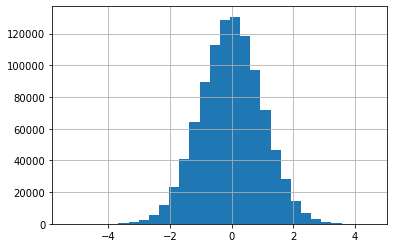

In [57]:
%%time
# Table 객체는 플롯 생성 시에도 ndarray 객체와 유사하게 작동한다.

plt.hist(tab2[:]['No3'], bins=30)
plt.grid(True)
print(len(tab2[:]['No3']))

Wall time: 645 ms


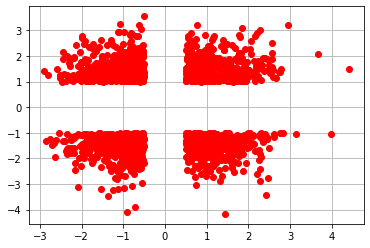

In [58]:
%%time

# SQL문과 유사한 방법으로 자료 쿼리도 당연히 가능하다.
res = np.array([(row['No3'], row['No4']) for row in
        tab2.where('((No3 < -0.5) | (No3 > 0.5)) \
                 & ((No4 < -1) | (No4 > 1))')])[::100]

plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)

In [59]:
%%time
# Pytables Table 객체에 저장된 자료를 다루는 것은 문법이나 성능면에서 모두 numpy를 사용해서 메모리 상의 자료를 다루는 듯한 느낌을 준다.

values = tab2.cols.No3[:]
print("Max %18.3f" % values.max())
print("Ave %18.3f" % values.mean())
print("Min %18.3f" % values.min())
print("Std %18.3f" % values.std())

results = [(row['No1'], row['No2']) for row in
           tab2.where('((No1 > 9800) | (No1 < 200)) \
                    & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print(res)

h5.close()

Max              4.568
Ave             -0.000
Min             -5.327
Std              0.999
(9914, 5384)
(9938, 4755)
(128, 5279)
(9868, 5031)
Wall time: 183 ms


In [61]:
# PyTables의 장점은 압축을 사용하는 방식이다. PyTables는 압축을 사용하여 디스크 공간을 절약할 뿐 아니라 동시에 입출력 연산 성능도 개선할 수도 있다.

# CPU는 입출력 시스템이 병목현상으로 지체되는 사이에 자료를 빠르게 압축하거나 해제할 수 있다.
# 따라서 압축으로 줄어든 자료의 양만큼 발생한 입출력 속도 개선이 압축 연산으로 인한 속도 저하를 능가할 수 있다.

# 테이블을 생성하고 분석하는데 걸리는 시간이 압축을 사용하지 않을 때와 비교하여 약간 느려지고, 읽기 속도는 전에 비해 훨씬 오래 걸린다.
# 하지만 디스크 공간을 많이 절약할 수 있다. 이는 백업이나 서버 사이 혹은 데이터 센터 사이의 대량 자료 전송에 중요할 수 있다.

# 데이터 파일의 크기를 줄이기 위해 테이블을 압축하려면 필터 생성시 압축 레벨과 압축 알고리즘을 선택한다.

filename = "tabcomp.h5"
h5c = tb.open_file(filename, 'w') 

filters = tb.Filters(complevel=4, complib='blosc')
tabc = h5c.create_table('/', 'ints_floats', sarray,
                        title='Integers and Floats',
                        filters=filters)

%time arr_com = tabc.read()
h5c.close()


Wall time: 144 ms


In [67]:
# Numpy가 ndarray 객체를 빠르게 읽고 쓸 수 있는 것처럼 Pytables도 ndarray를 빠르고 효율적으로 읽거나 저장할 수 있다.
# hdf5 에서는 구조화 배열과 같이 복합 자료 구조인 테이블 이외에도 일반 NumPy 배열에 해당하는 array 객체도 지원한다.
# array 객체를 생성할 때는 다음 문서를 참조하여 직접 스키마를 생성하거나 파일 객체의 create_array 메서드로 일반 NumPy 배열을 hdf5 파일에 저장할 수도 있다. 참고 : http://www.pytables.org/usersguide/libref/homogenous_storage.html

# 메모리보다 큰 배열의 연산을 구현 가능하게 해주는 out-of-memory 연산을 Pytable를 이용하여 구현할 수 있다.

filename = 'array.h5'
h5 = tb.open_file(filename, 'w')

# 첫 번째 차원에서는 확장 가능하고 두 번째 차원에서는 50개의 고정된 폭을 가지는 EArray 객체를 생성한다.
n = 50
ear = h5.create_earray(h5.root, 'ear',
                      atom=tb.Float64Atom(),
                      shape=(0, n))


In [68]:
%%time
# 확장 가능한 객체는 청크(chunk) 단위로 생성할 수 있다.

rand = np.random.standard_normal((n, n))
for i in range(750):
    ear.append(rand)
ear.flush()

Wall time: 92.8 ms


In [69]:
# 얼마나 많은 자료를 생성했는지 알아보기 위해 객체가 제공하는 메타 정보와 디스크 공간 소비량을 출력해본다.
print(ear)
print(ear.size_on_disk)

/ear (EArray(37500, 50)) ''
15061200


In [70]:
# out of memory 계산 결과를 저장할 또 다른 EArray 객체를 데이터베이스에 생성한다.
out = h5.create_earray(h5.root, 'out',
                      atom=tb.Float64Atom(),
                      shape=(0, n))

# Pytables는 수치 표현식을 효율적으로 다루는 Expr이라는 특별한 모듈을 가지고 있으며 이는 numexpr 라이브러리에 기반하였다.
# PyTables 패키지는 numexpr 패키지를 사용하여 out-of-core 연산을 할 수 있다. out-of-core 연산이란 메모리에 올릴 수 없는 대량의 데이터를 메모리에 올리지 않고도 파일에서 계산하는 것을 말한다.

# 수치 표현식을 문자로 입력
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')     

# 결과를 저장할 디스크 기반의 배열 설정
expr.set_output(out, append_mode=True)

# 수치 표현식을 실제로 계산하여 디스크 기반의 배열에 저장
%time expr.eval()

print(out[0, :10])
h5.close()

Wall time: 117 ms
[-1.05294453 -1.77179916  4.05728225  4.27867813  3.57218316  0.84360706
 -1.28950794  4.10282092 -1.09733363 -1.54227232]


In [71]:
# 이렇게 HDF5 데이터베이스(파일) 포맷은 구조화된 수치 자료나 금융 자료를 다루는 데 있어 관계형 데이터베이스의 대용품이 될 수 있다.
# 독자적으로 사용하든 pandas 와 결합하여 사용하든 하드웨어가 허용하는 최대한의 입출력 성능을 기대할 수 있다.

# pandas를 다음과 같이 PyTables와 결합하면 입출력 속도를 더 개선할 수 있다.

h5s = pd.HDFStore('arraynumbs.h5s', 'w')
%time h5s['data'] = data
print(h5s)
h5s.close()

Wall time: 25.9 ms
<class 'pandas.io.pytables.HDFStore'>
File path: arraynumbs.h5s



In [73]:
%%time

# 읽기는 더 빠르다
h5s = pd.HDFStore('arraynumbs.h5s', 'r')
temp = h5s['data']
h5s.close()

Wall time: 35.9 ms


In [ ]:
# 요약하면
# SQLite3로 자료를 쓰는 데는 수 초가 걸리고 pandas는 1초도 걸리지 않는다.
# SQL 데이터베이스에서 자료를 읽는 데는 수 초 이상이 걸리지만 pandas에서는 0.1초도 걸리지 않는다.a

# 금융이나 과학기술 분야의 많은 응용 영역에서는 주로 배열 기반의 자료 모델링 방식이 성공적일 수 있다.
# 이 경우에는 numpy 입출력 기능을 사용하거나 numpy와 PyTables 기능을 조합하거나 또는 HDF5 기반의 저장소를 사용하는 pandas 기능을 사용하는 것이 성능 향상에 훨씬 도움이 된다.

# 마이크로소프트 리서치느에서는 이런 종류의 작업에서는 단일 '스케일-업' 서버가 성능, 비용, 전력, 서버 밀도면에서 클러스터와 같거나 더 낫다고 주장한다.

# 스케일 아웃 : 표준 CPU와 상대적으로 낮은 메모리가 장착된 다수의 저가 노드를 가진 클러스터를 사용하는 경우
# 스케일 업 : 다수의 코어를 가진 CPU와 GPU, 그리고 대량의 메모리가 장착된 소수의 강력한 서버를 사용하는 경우

# 따라서 하드웨어를 스케일 업하고 다른 구현 방식을 취하는 것이 성능 향상에 큰 영향을 미친다는 점을 알 수 있다.
# 성능 향상은 parallel_programming.ipynb 와 time_series_optimization.ipynb 파일을 참고한다.

### 두 번째로 Pytables가 아닌 h5py를 사용해서 HDF5를 구현해보자

- hdf 파일 h5py.File(name,mode=None, ...) 형태로 객체를 생성하여 파일을 열게된다.
- 모드에는 다음과 같은 5가지가 있다.

    - r Readonly, file must exist
    
    - r+ Read/write, file must exist    
    
    - w Create file, truncate if exists
    
    - w- or x Create file, fail if exists
    
    - a Read/write if exists, create otherwise (default)


### 그룹(group)

- 그룹은 컨테이너 역할을 한다. HDF5 파일에는 항상 루트 그룹 / 이 존재하며, 파일객체는 루트 그룹으로 취급할 수 있다. 

- 그룹에 하위 그룹을 만드는 것은 group.create_group(name, ...) 로 생성한다. 

- 이때 name은 /로 시작하면 절대경로가, 그렇지 않으며 상대 경로가 사용된다.

In [74]:
import numpy as np
import h5py

fdata = np.arange(10.)

f = h5py.File('group.h5','w')

f.create_group('1')
f.create_group('/2/1')

f['/2'].create_group('2')

f['/2'].create_group('/3/4/1')  #  f.create_group('/3/4/1')
f['/2'].create_group('3/4/1')  

f['/4/data'] = fdata    # f.create_dataset('/4/data',data=fdata)

f.close()

# 위에서 순차적으로 그룹을 만들지 않드라도 은연중에 그룹이 생성됨을 알 수 있다. 또한 group.create_dataset(name,data=data)로 데이터셋을 생성할 때 마찬가지이다.

# 위에서 생성한 파일의 구조는 다음과 같이 h5ls나 h5dump 유틸러티로 확인해 볼 수 있다. 또는 HDFView를 통해 시각적으로 확인할 수 있다.

In [75]:
# 그룹의 중요 멤버는 [key], name, attrs 등이다.
f = h5py.File('group.h5','r')
print(f['/1'])
print(f['/1'].name)
print('\n')

# 순회가 필요하면 keys(), items(), values() 을 사용한다.

for k in f.keys():
    print(f[k].name)
print('\n')
print('\n')

for k,v in f.items():
    print(k,v.name)
print('\n')
print('\n')

for v in f.values():
    print(v.name)
print('\n')
print('\n')


<HDF5 group "/1" (0 members)>
/1


/1
/2
/3
/4




1 /1
2 /2
3 /3
4 /4




/1
/2
/3
/4






### 데이터셋 - 기초

- 데이터셋은 동일한 데이터타입을 갖는 수치로 이루어진 배열(1차던, 2차던, 고차던)을 저장한다. numpy의 ndarray에 이름을 붙여 저장한다고 생각할 수 있다.

- 생성은 그룹의 멤버함수인 create_dataset(...) 로 생성할 수 있다.

- dataset = group.create_dataset(name,shape=None,dtype=None,data=None,...)
이미 만들어진 데이터셋의 중요 속성은 name, shape, dtype 이다. ndarray로 데이터를 지정할 때는 shape과 dtype을 지정할 필요없다.

In [76]:
import numpy as np
import h5py

fdata = np.arange(5.)

f = h5py.File('dataset.h5','w')

data1 = f.create_dataset('data1',data=fdata)   # same to f['data'] = fdata

print(data1.name)  # /data1
print(data1.shape)  # (5,)
print(data1.dtype)  #[  0. 500.   2.   3.   4.]
print('\n')

# 데이터셋을 억세스하는 것은 ndarray와 동일하게 []를 이용한다(예전에서는 dataset.value로 직접 내부의 ndarray를 접근하였으나 depreciated 됨)로 가능하다. 아래와 같이 변경하면 바로 값이 변경된다.

data1[1] = 500
data1[2:5] = -1.4
print(data1[:])

# 저장할 공간만 미리 정해 놓고 나중에 값을 대입하는 것은 다음과 같다. flush()를 사용하여 바로 쓰도록 해야 한다(호출하지 않으면 파일 닫힐 때 불림)
d = f.create_dataset('data2',shape=(5,),dtype='float')
d[:] = fdata
f.flush()
f.close()


/data1
(5,)
float64


[  0.  500.   -1.4  -1.4  -1.4]


- 위에서 dtype을 직접 지정할 때는 numpy의 다양한 데이터타입이 가능하다( dtype = numpy.float32, dtype = np.dtype('int') 등등). NumPy 배열을 데이터로 지정하면서 dtype을 지정하면 형변환이 이루어지며 복사되게 된다.

- f.create_data('data',data=fdata,dtype=np.dtype('float32'))

- 위에서 fdata의 dtype은 float64 (64비트 실수)인데, 데이터셋의 dtype을 float32로 지정했기 때문에 32 비트 크기의 배열로 저장된다.

- 크기가 변경가능하게 하려면 maxshape 인자를 데이터셋을 생성할 때 지정해야 한다.



In [77]:
import numpy as np
import h5py

data = np.array([[1,2],[3,4]])

f = h5py.File('datasetresize.h5','w')

# 처음 데이터셋을 생성할 때 (2,2) 로 생성하고, maxshape 인자에서 None 지정된 축으로 크기가 변경할 수 있다는 의미이다. 즉, (2, any) 형태로 변경할 수 있다.
d = f.create_dataset('dset',(2,2),dtype='int',maxshape=(2,None))
print(d.shape)     # (2,2)
print(d.maxshape)  # (2,None)

d[:] = data

print(d[:])
d.resize((2,10))
print(d[:])
f.close()

(2, 2)
(2, None)
[[1 2]
 [3 4]]
[[1 2 0 0 0 0 0 0 0 0]
 [3 4 0 0 0 0 0 0 0 0]]


### 데이터셋 - 고급

- dataset을 생성할 때 dtype 인자가 주어지지 않는 경우 주어진 numpy array의 dtype으로 설정되게 된다. 만약 보다 다양한 데이터 타입을 사용하고자 하면 dtype을 인자로 주어야 한다.

    - 정수 : np.dtype("i") , np.dtype("i8"), np.dtype("int"), np.dtype("<i8"), ...
    
    - 실수 : np.dtype("f"), np.dtype("float64"), ...

    - 고정길이 문자열 : np.dtype('S10')

    - 가변길이 문자열 : h5py.string_dtype(encoding='utf-8')

    - 가변길이 데이터 : h5py.vlen_dtype(np.dtype('int32')), ...

    - 컴파운드(C의 구조체, np의 structured array) : dtype = [('name','S10'),('age','<i4'),('height','<f4')]
    가변길이 데이터를 포함한 컴파운드 : vdtype = h5py.vlen_dtype(np.dtype("float64")); dtype=[("no", np.dtype("int")), ("nodes",vdtype)]

- 이외에도 열거형 등 다양한 타입을 지원한다.

In [93]:
# 가변길이 문자열
# NumPy의 데이터타입을 모두 지원하기 때문에 NumPy 배열을 dataset으로 저장하는 데는 문제가 없다. 하지만 NumPy의 데이터타입이 아닌 경우 특수한 처리가 필요하다. 대표적예가 문자열이다. 문자열은 string_dtype(encoding=encoding)으로 특수 타입을 만들어 사용한다(주의 예전버전은 special_dtype(vlen=str)을 사용하였음)

import numpy as np
import h5py

data = np.array([1,2,3])
tags = ['James','Cook','Linda']

f = h5py.File('datasetstr.h5','w')
f['data'] = data   # f.create_dataset('data',data=data)
sdtype = h5py.string_dtype(encoding='utf-8')
# (3,) array of string
dset = f.create_dataset('strdata',(3,),dtype=sdtype)
dset[0] = 'James'
dset[1] = 'Cook'
dset[2] = 'Michael'

# only one string : (1,) string
f.create_dataset('strdata2',data='This is special type',dtype=sdtype)
f.close()

f = h5py.File('datasetstr.h5','r')
A = f['strdata'][0]
B = f['strdata2'][()]   # zero-dimension case 'CAUTION'
f.close()

AttributeError: module 'h5py' has no attribute 'string_dtype'

In [82]:
# 가변길이 데이터(vlen data)
# NumPy 배열은 각 요소의 크기가 일정한 것이 특징이다. h5py는 배열 요소의 크기가 가변인 데이터를 지원한다(h5py 버전 2.10.0 부터 지원)

# import h5py 
# import numpy as np 

# f = h5py.File('vlen.h5','w')

# dtype = h5py.vlen_dtype(np.dtype('int32'))
# dataset = f.create_dataset('vlen_int',(3,),dtype=dtype)
# dataset[0] = [1,2,3]
# dataset[1] = [1,2,3,4,5]
# f.close()

# 가변길이 데이터를 타입으로 지정할 경우 열의 수가 1인 dataset만 가능하다. 따라서 정수, 실수 등이 혼합되어 있는 경우는 뒤에 설명할 vlen 데이터를 포함한 compound로 처리해야 한다.

AttributeError: module 'h5py' has no attribute 'vlen_dtype'

In [84]:
# 컴파운드
# C의 구조체를 성분으로 갖는 배열은 NumPy에서 structured array이다. HDF5 역시 이를 지원하다.

import numpy as np
import h5py

name = ['Alice', 'Bob', 'Doug']
age = [25, 45, 37]
height = [173.,181.,165.]

dtype = [('name','S10'),('age','<i4'),('height','<f4')]
data = np.zeros(3,dtype=dtype)
data['name'] = name
data['age'] = age
data['height'] = height

f = h5py.File('compound.h5','w')
f['data'] = data   # d = f.create_dataset('data',dtype=dtype)
                   # d[:] = data
f.close()

In [85]:
# 가변길이 데이터를 가지는 컴파운드
# 컴파운드를 구성할 때 가변길이 데이터를 구성요소로 지정하면 다양한 형식으로 저장할 수 있다.

# import h5py
# import numpy as np


# # np.dtype("<i8")  == np.dtype('int64')

# vlen_dtype = h5py.vlen_dtype(np.dtype("float64"))

# f = h5py.File('compound-vlen.h5', "w")
# dset = f.create_dataset(
#     "elem_nodes",
#     shape=(5,),
#     maxshape=(None,),
#     chunks=True,
#     compression="gzip",
#     dtype=[("no", np.dtype("int")), ("nodes", vlen_dtype)],
#     # dtype=[("no", np.dtype("<i8")), ("nodes", np.dtype("<i8"))],
#     # dtype=dt
# )

# dset[0] = (1, np.array([1, 2], dtype=np.dtype("float64")) )
# dset[1] = ( 2, np.array([2, 3, 4]))
# dset[2] = ( 3, np.array([2, 3, 4], dtype="float64"))

# f.close()

AttributeError: module 'h5py' has no attribute 'vlen_dtype'

### 속성 - 기본

- HDF5의 가장 큰 장점 중 하나가 그룹이나 데이터셋을 부연 설명하는 사용자 정의 메타 데이터를 속성으로 지정할 수 있다는 점이다. 

- 속성(attribute)는 그룹이나 데이터셋 객체의 attrs 멤버로 억세스할 수 있으며 dictionary 타입처럼 사용할 수 있다.

In [87]:
import numpy as np
import h5py

sensor = np.random.random(100)

f = h5py.File('attr.h5','w')
f['sensor'] = sensor
f['sensor'].attrs['dt'] = 5.
f['sensor'].attrs['time'] = '2019.12.3'

f.close()

#---------------------------
f = h5py.File('attr.h5','r')

sensor_data = f['sensor']
sensor_attrs = sensor_data.attrs

dt = sensor_attrs['dt']
print('dt = ',dt)

print('---attrs.keys()')
for key in sensor_attrs.keys():
    print(key, ':', sensor_attrs[key])

print('---attrs.values()')
for value in sensor_attrs.values():
    print(value)

print('---attrs.items()')
for key,value in sensor_attrs.items():
    print(key,':', value)

dt =  5.0
---attrs.keys()
dt : 5.0
time : 2019.12.3
---attrs.values()
5.0
2019.12.3
---attrs.items()
dt : 5.0
time : 2019.12.3


### 링크

- HDF5는 hard link와 soft link(=symbolic link)를 지원한다. 

- 이는 UNIX에서 파일의 숏컷으로 제안되었으며, symbolic link는 Windows에서도 지원한다. 

- UNIX에서의 구분은 다음으로 이해할 수 있다.

    - 예를 들어서 a.txt라는 파일이 있다고 가정한다. 이 파일을 가르키는 hard link를 만들었다면, hard link를 삭제하거나 원 파일을 삭제하더도 실제 파일이 삭제되지는 않는다. 내부적으로 reference counter를 유지하며 이가 0이 될때 실제로 삭제하게 된다(파일을 생성되지 마자 그 자체가 hard link, 즉 reference counter 가 1이다). 즉, smart pointer와 유사한 개념이다.

    - Soft link는 단순히 경로만 저장한다. a.txt를 삭제하면 실제로 그 파일이 삭제되며, 연결된 soft link는 의미없게 된다(dangling).

- HDF5는 그룹과 데이터셋을 대상으로 hard link, soft link를 사용할 수 있다. 다음은 단순히 그룹에 대한 hard link를 생성하고 h5dump로 관찰한 결과이다. (h5dump link1.h5)

In [88]:
import numpy as np
import h5py

f = h5py.File('link1.h5','w')

g1 = f.create_group('g1')
f['g2'] = g1

f.close()

In [89]:
# 다음은 단순히 데이터셋에 대한 hard link를 생성하고 h5dump로 관찰한 결과이다. (h5dump link2.h5)
import numpy as np
import h5py

f = h5py.File('link2.h5','w')

d1 = f.create_dataset('d1',shape=(2,2),dtype=np.int32)
g1 = f.create_group('g1')
f['g2'] = g1
g1['d2'] = d1

f.close()

### 실제 예제

- 유한요소결과 데이터 저장

In [92]:
import numpy as np
import h5py


inp = '''
*Title
 test

*Node
 1, 0, 0, 1
 2, 2, 1, 0

*Element, TYPE=Element
 1,2,1

*Step
 0.1
'''


nodes = [
  [1,3,1,0,0],
  [2,3,0,21],
  [3,1,2,1,3],
  [4,5,1,2,3,1,4]]

elms = [
        [1, 0,0, 10,0],
        [2, 10,0,12,1],
        [3, 1,2,3,-4,2,1]]

f = h5py.File('fem.h5','w')

sdtype = h5py.special_dtype(vlen=str)
vdtype = h5py.vlen_dtype(np.dtype('float64'))

#inpGroup = f.create_group('/inp')           
#inpGroup.create_dataset('inp',data=inp,dtype=sdtype)  # only one string : (1,) string

f.attrs['inp'] = inp

step1 = f.create_group('/Step1')         # /2/1
step1.attrs['TargetElement'] = 'Elset1, Elset2, Elset3'
step1.attrs['TargetLoad'] = 'LC1, LC2'
step1.attrs['TargetConstraint'] = 'C1, C2'
step1.attrs['FieldOutputs'] = 'D, SF'

dofs = np.zeros((len(nodes),2),dtype='int')
for i,n in enumerate(nodes):
    dofs[i,0] = n[0]
    dofs[i,1] = n[1]

step1.attrs['dofs'] = dofs    

frame1 = step1.create_group('frame1')
frame1.attrs['time'] = 0.1


disp = frame1.create_dataset('D',shape=(4,),dtype=[("id",np.dtype('int')),("data",vdtype)])

for i, n in enumerate(nodes):
    disp[i] = (n[0],np.array(n[2:]))

sf = frame1.create_dataset('SF',shape=(3,),dtype=[("id",np.dtype('int')),("data",vdtype)])


for i, e in enumerate(elms):
    sf[i] = (e[0],np.array(e[1:]))

f.close()


f = h5py.File('fem.h5','r')
inputStream = f.attrs['inp']
print(inputStream)


f.close()

AttributeError: module 'h5py' has no attribute 'vlen_dtype'

In [91]:
f.close()